In [4]:
import torch
import torchvision

from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

data_transform = transforms.ToTensor()

train_data = FashionMNIST(root = './data', train = True, download = False, transform = data_transform)
test_data = FashionMNIST(root = './data', train = False, download = False, transform = data_transform)

print('Train data, number of images: ', len(train_data))
print('Test data, number of images: ', len(test_data))

Train data, number of images:  60000
Test data, number of images:  10000


In [5]:

batch_size = 20

train_loader = DataLoader(train_data,batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_data, batch_size = batch_size, shuffle = True)

classes = ['T-shirt/top', 'Trouse', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

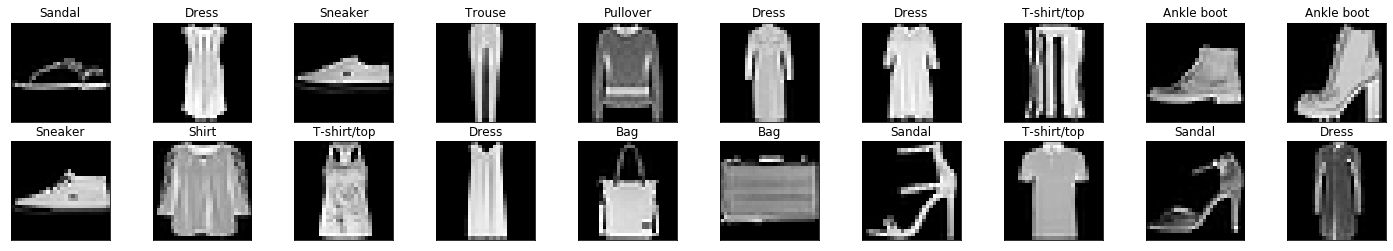

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize = (25,4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx + 1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(images[idx]), cmap = 'gray')
    ax.set_title(classes[labels[idx]])

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 10, 3)
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(10, 20, 3)
        
        self.fc1 = nn.Linear(20*5*5, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = x.view(x.size(0), -1)
        
        x = F.relu(self.fc1(x))
        
        x = F.log_softmax(x, dim = 1)
        
        return x
    
net = Net()
print (net)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=500, out_features=10, bias=True)
)


In [8]:
import torch.optim as optim

criterion = nn.NLLLoss()

optimizer = optim.SGD(net.parameters(), lr = 0.001)



In [ ]:
correct = 0
total = 0 

for images, labels in test_loader:
    
    outputs = net(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
accuracy = 100.0 * correct.item()/ total
print('Accuracy before training : ', accuracy)


In [9]:
def train(n_epochs):
    
    loss_over_time = []
    
    for epoch in range(n_epochs):
        
        running_loss = 0.0
        
        for batch_i, data in enumerate(train_loader):
            inputs,labels = data
            optimizer.zero_grad()
            
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            
            loss.backward()
            
            optimizer.step()
            
            running_loss += loss.item()
            
            if batch_i % 1000 == 999:
                avg_loss = running_loss/1000
                loss_over_time.append(avg_loss)
                print("Epoch: {}, Batch: {}, Avg.Loss: {}".format(epoch + 1, batch_i + 1, avg_loss))
                running_loss = 0.0
    print('finished training')
    return loss_over_time

In [ ]:
n_epochs = 30
training_loss = train(n_epochs)